# Talon Lusk

## Exploratory Data Analysis

### Importing Data

In [ ]:
from project_functions1 import *
df = pd.read_csv("../data/raw/top_directors.csv")
df_clean = load_and_process("../data/raw/top_directors.csv")
df_clean

,director,negative_format,year,budget,genres,film_type
3967,"Watts, Jon",NaN,2017,175000000.0,Comedy,U
1698,"Gray, F. Gary",SRMemory,2017,250000000.0,Thriller,D
204,"Arcel, Nikolaj",35 mm,2017,60000000.0,Romance,F
563,"Caro, Niki",35 mm,2017,20000000.0,Drama,F
562,"Caro, Niki",35 mm,2017,20000000.0,Crime,F
...,...,...,...,...,...,...
803,"Coleman, Warren",Codex,2006,85000000.0,Comedy,D
1638,"González Iñárritu, Alejandro",NaN,2006,20000000.0,Drama,U
1639,"González Iñárritu, Alejandro",NaN,2006,20000000.0,Fantasy,U
3445,"Sonnenfeld, Barry",35 mm,2006,55000000.0,Biography,F


In [ ]:
df1 = (
pd.read_csv("../data/raw/top_directors.csv")
        .rename(columns={"production_year": "year"})
        .merge(pd.read_csv("../data/raw/top_movies.csv"), on=['id'], how="left", suffixes=('', '_y'))
        .loc[:, ["director", "negative_format", "year", "budget", "genres", "negative_format"]]
)

### Reviewing Initial Data
From the initial data set I grabbed, there were a lot of unneeded columns that were taking up space. Simple things like Director ID's and ID's of Movies were of no value when it came to starting to plot my data. As well I removed the genres and Co-Directors since I wanted to minimize the amount of clutter in the Data Frame.

In [ ]:
print(df.shape)
print(df.describe().apply(lambda s: s.apply(lambda x: format(x,'f'))))
print(df.columns)
df.head()
df.negative_format.unique()

(3635, 11)
      production_year              id     director_id
count     3635.000000     3635.000000     3635.000000
mean      2011.508941  3949564.899587  1632997.890784
std          3.453618   413893.060250  1081841.048771
min       2006.000000  3211460.000000     1975.000000
25%       2009.000000  3601965.000000   780406.000000
50%       2011.000000  3976222.000000  1504152.000000
75%       2014.000000  4338652.000000  2276982.500000
max       2017.000000  4610267.000000  5400585.000000
Index(['production_year', 'id', 'title', 'director', 'director_id',
       'co_directors', 'co_directors_id', 'genres', 'cameras',
       'negative_format', 'film_type'],
      dtype='object')


array(['Digital', '35 mm|Video', '35 mm', '16 mm|35 mm|8 mm|Redcode RAW',
       '35 mm|65 mm|Redcode RAW', '35 mm|65 mm', 'Super 16', nan,
       'Redcode RAW', 'Codex', '16 mm|35 mm|8 mm|Codex',
       'Codex|Redcode RAW', 'ARRIRAW|Gemini444', 'Video', 'AXSM|SRMemory',
       'SRMemory', 'SxS Pro', 'Codex ARRIRAW', 'Digital|HDCAM',
       'Digital|Redcode RAW', '16 mm', 'HD', '16 mm|Digital',
       '35 mm|Codex', '16 mm|35 mm|Redcode RAW', 'CineForm RAW|Video',
       'Gemini 4|Redcode RAW',
       '35 mm|ARRIRAW|Redcode RAW|Uncompressed Digital',
       '35 mm|Redcode RAW|Video', '35 mm|IMAX Digital 3-D|Redcode RAW',
       '16 mm|Codex|IMAX Digital 3-D|Redcode RAW', '35 mm|Codex ARRIRAW',
       '65 mm|Codex|Redcode RAW|SRMemory', 'ARRIRAW', '16 mm|Video',
       'HDCAM', 'Codex ARRIRAW|Redcode RAW', 'Redcode RAW|Video',
       'Codex ARRIRAW|SRMemory', '35 mm|Digital|Video',
       '35 mm|Uncompressed Digital|Video', 'Codex|Video',
       '16 mm|35 mm|Codex|Redcode RAW', '35 mm|R

### Clean Data
After reviewing what I could do with Method Chaining, I had decided to keep the [Year, Director, Format], showing which Format the movie was shot on. That brought it down from 11 columns to a number of 3. The rows had increased in size as I needed to split up multiple formats that were in the same cell. To do that I created a new row and put them below to seperate them. Afterwards I removed any NaN rows that were in the Format column and made sure there were no duplicate rows that contained the same data. Lastly I made sure to sort the rows so they were in order of Year.

In [ ]:
print(df_clean.shape)
print(df_clean.describe().apply(lambda s: s.apply(lambda x: format(x,'f'))))
print(df_clean.columns)
df_clean.head()
df_clean.negative_format.unique()

(1360, 5)
              year            budget
count  1360.000000       1360.000000
mean   2011.250000   69516797.794118
std       3.330573   60474404.493203
min    2006.000000          0.000000
25%    2008.000000   25000000.000000
50%    2011.000000   50000000.000000
75%    2014.000000  100000000.000000
max    2017.000000  378500000.000000
Index(['director', 'negative_format', 'year', 'budget', 'genres'], dtype='object')


array(['Codex', 'SxS Pro', nan, '35 mm', 'Video', 'SRMemory', 'AXSM',
       'Digital', 'Codex ARRIRAW', 'Super 16', 'Uncompressed Digital',
       'Redcode RAW', '65 mm', 'Gemini 4', 'CineForm RAW', '16 mm',
       'HDCAM', 'ARRIRAW', 'Super 8mm', 'DVCPRO Full 4', '8 mm',
       'Gemini444', 'CF', 'IMAX Digital 3-D', 'HD', 'S.two OB-1',
       'Super 8'], dtype=object)

/var/folders/sz/bp4p48sn3zv3w4_99y84m0j80000gn/T/ipykernel_32056/1134004300.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_clean.corr()# plot the heatmap


<AxesSubplot: >

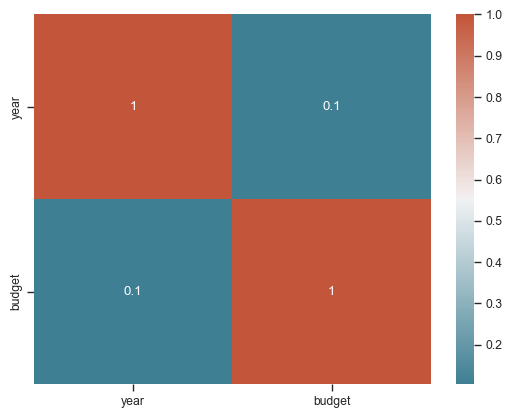

In [ ]:
sns.countplot(df_clean, x="negative_format")
df_clean

# calculate correlation matrix
corr = df_clean.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<seaborn.axisgrid.FacetGrid>

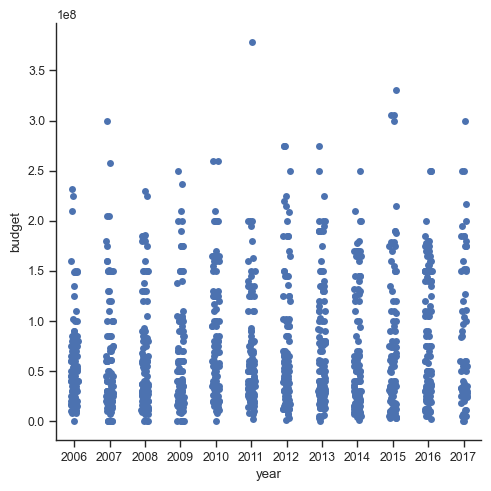

In [ ]:
sns.catplot(df_clean, x="year", y="budget")

<AxesSubplot: xlabel='year', ylabel='count'>

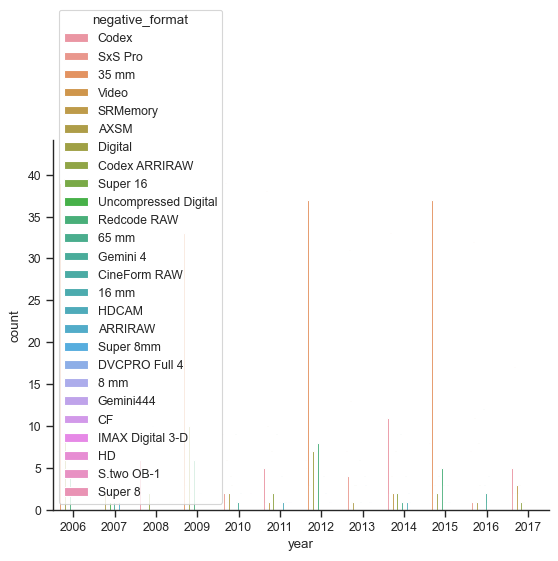

In [ ]:
sns.countplot(df_clean, x="year", hue="negative_format")

In [ ]:
df_clean.to_csv('../data/processed/talon.csv')